In [1]:
import gzip
import io
import sys
import time
import unittest
from typing import List
from Point import Point
from TimeSeriesReader import TimeSeriesReader
from datetime import datetime, timedelta
from utilFunction import *
import TestPLA 
from BSTSimPiece import BSTSimPiece
from TestPLA import *
sys.path.append('/home/guoyou/ExtractSemantic/Data/')
path = '/home/guoyou/ExtractSemantic/Data/'

4


In [2]:
filenames = ["Cricket.csv.gz", "FaceFour.csv.gz", "Lightning.csv.gz", "MoteStrain.csv.gz", "Wafer.csv.gz", "WindSpeed.csv.gz", "WindDirection.csv.gz", "Pressure.csv.gz"]
filename = filenames[0]

delimiter = ","
with open(path+filename, 'rb') as inputStream:
    print(filename)
    ts = TimeSeriesReader.getTimeSeries(inputStream, delimiter, True)

Cricket.csv.gz


In [3]:
epsilonPct = 0.05

start_time = time.time()
bstSimPiece = BSTSimPiece(ts.data, ts.range * epsilonPct, False, False)
end_time = time.time()
duration = int((end_time - start_time) * 1000)
binary = bstSimPiece.toByteArray(variableByte=False, zstd=False)
compressedSize = len(binary)
inresiduals = bstSimPiece.residuals
print(f"Epsilon: {epsilonPct * 100:.2f}%\tCompression Ratio: {ts.size / compressedSize:.3f}\tExecution Time: {duration}ms\tRange Error: {ts.range * epsilonPct:.3f}")

Epsilon: 5.00%	Compression Ratio: 76.727	Execution Time: 1112ms	Range Error: 1.145


In [4]:
bstSimPiece = BSTSimPiece(bytes=binary, variable_byte=False, zstd=False)
tsDecompressed = bstSimPiece.decompress(inresiduals)
#residuals =  [Point(p1.timestamp, p1.value - p2.value) for p1, p2 in zip( ts.data, tsDecompressed)]

In [5]:
epsilon = ts.range * epsilonPct
print("ts.range  = ", ts.range ,"epsilon = ", epsilon)

idx = 0
for expected in tsDecompressed:
    actual = ts.data[idx]
    if expected.timestamp != actual.timestamp:
        continue
    idx += 1
    if(abs(actual.value-expected.value)>1.1 * epsilon):
        print("Value did not match for timestamp " + str(actual.timestamp))
        print("actual  = ", actual.value , "expected.value = ", expected.value)
if(idx!=len(ts.data)):
    print("Error with length")

ts.range  =  22.906033 epsilon =  1.1453016500000002


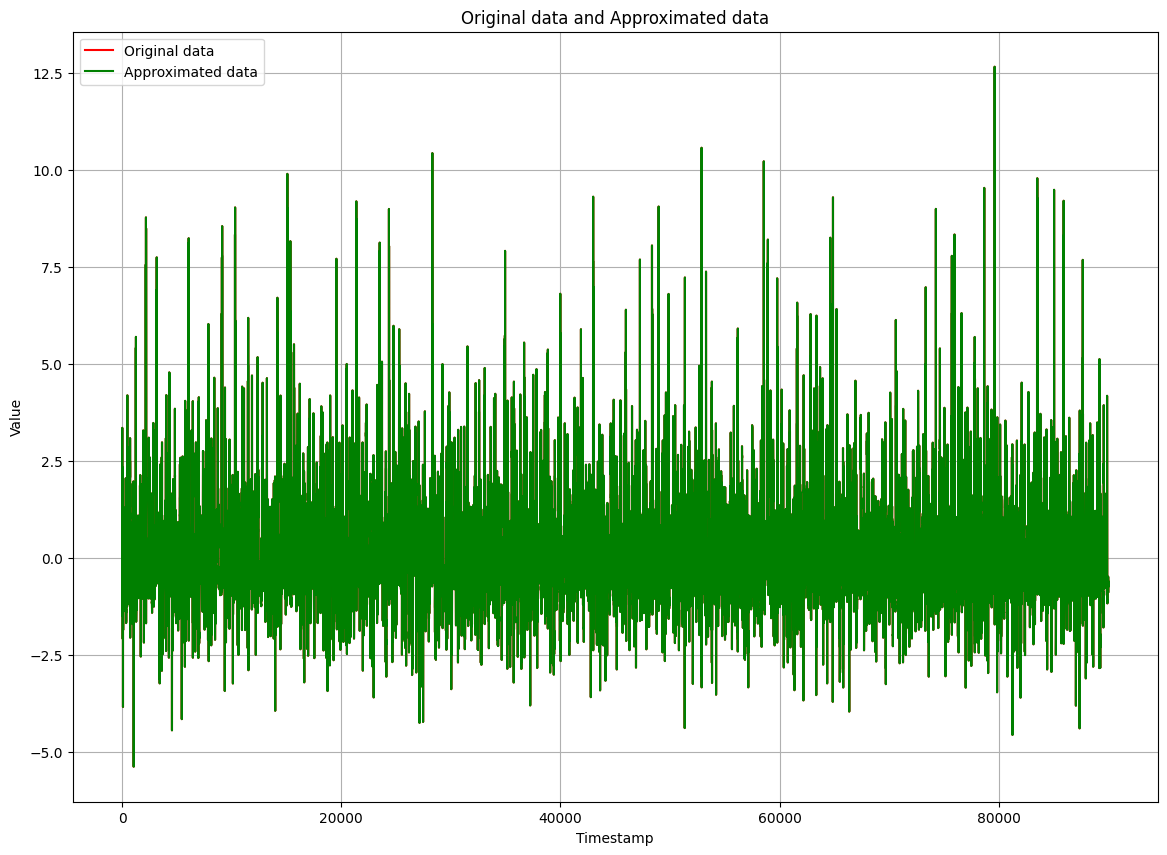

In [9]:
#plot_simpleline(ts.data[:10000], title="original data")
#plot_simpleline(tsDecompressed[:10000], title="decompressed data")
plot_two_line_graphs(ts.data, tsDecompressed, end =90000, title="Original data and Approximated data")

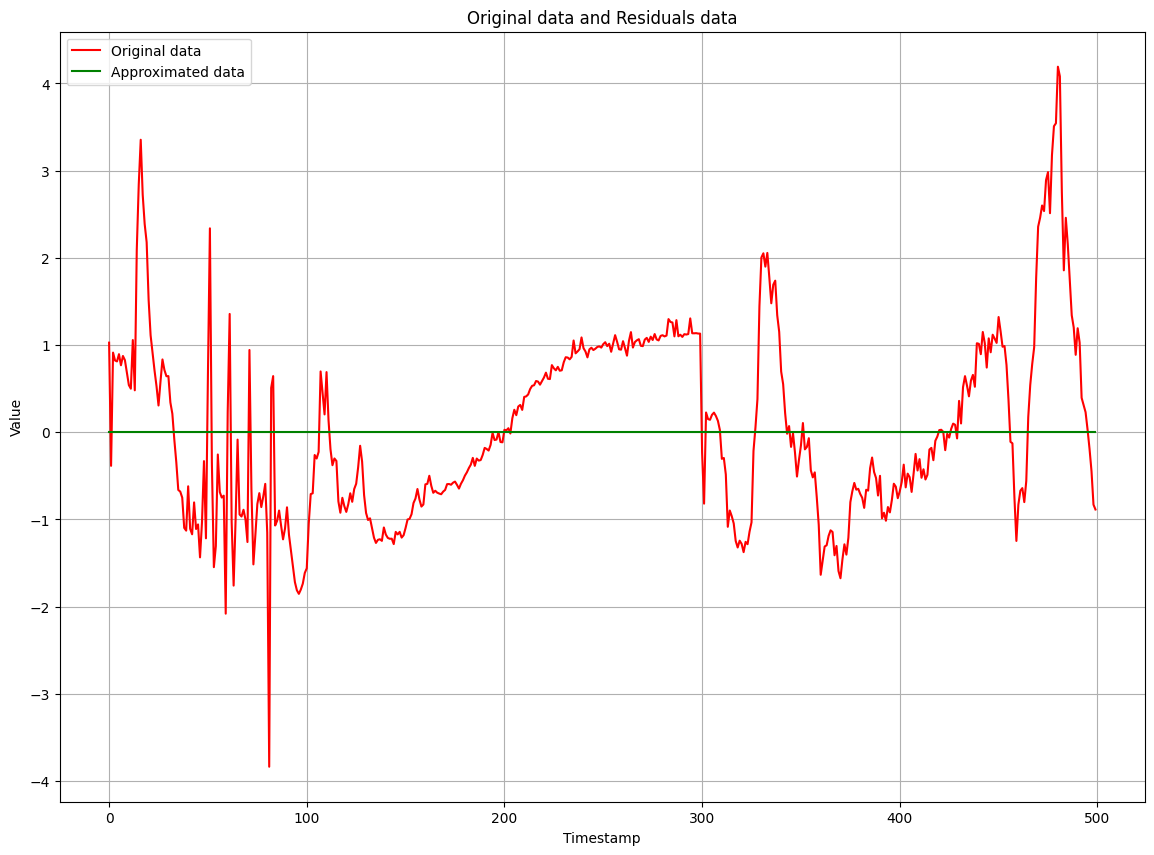

In [10]:
residuals =  [Point(p1.timestamp, p1.value - p2.value) for p1, p2 in zip( ts.data, tsDecompressed)]
plot_two_line_graphs(ts.data, residuals, end =500, title="Original data and Residuals data")

In [11]:
residuals =  [p.value for p in residuals[:20]]
print(residuals)
print(inresiduals[:20])

[-4.9638366528270694e-08, -4.618751514584574e-08, -4.273666376342078e-08, -3.928581226997352e-08, -4.9638366528270694e-08, -4.876483905569273e-08, -4.789131158311477e-08, -4.701778411053681e-08, -4.614425663795885e-08, -4.5270729165380885e-08, -4.439720147075832e-08, -4.3523673998180357e-08, -4.2650146525602395e-08, -4.177661899751328e-08, -4.090309158044647e-08, -4.002956410786851e-08, -1.489150998068567e-07, -1.531402324950193e-07, -1.573653651831819e-07, -1.615904978713445e-07]
[-0.11786115000000019, -1.0430305500000001, 0.7420494799999999, 1.13882892, -0.3329589700000002, -0.3027168628125001, -0.4831362356250001, -0.4297365084375, -0.53052225125, -0.7273085440624999, -0.922628296875, -1.0170005296875, -0.5122338925000001, -1.1415187453125, 0.4169751218750002, 1.1117666290625001, -0.08209405000000025, -0.470356061825397, -0.5656716736507938, -0.5333913854761905]


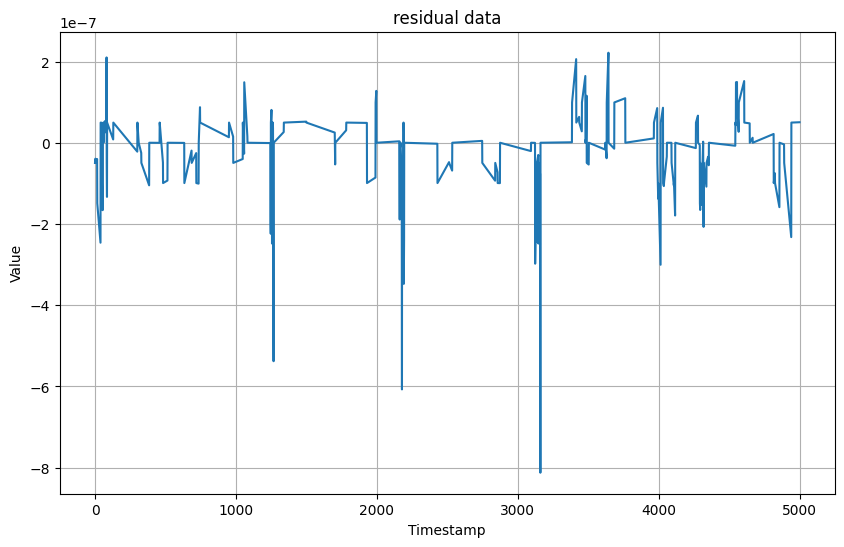

In [13]:
residuals =  [Point(p1.timestamp, p1.value - p2.value) for p1, p2 in zip( ts.data, tsDecompressed)]
plot_simpleline(residuals[:5000], title="residual data")

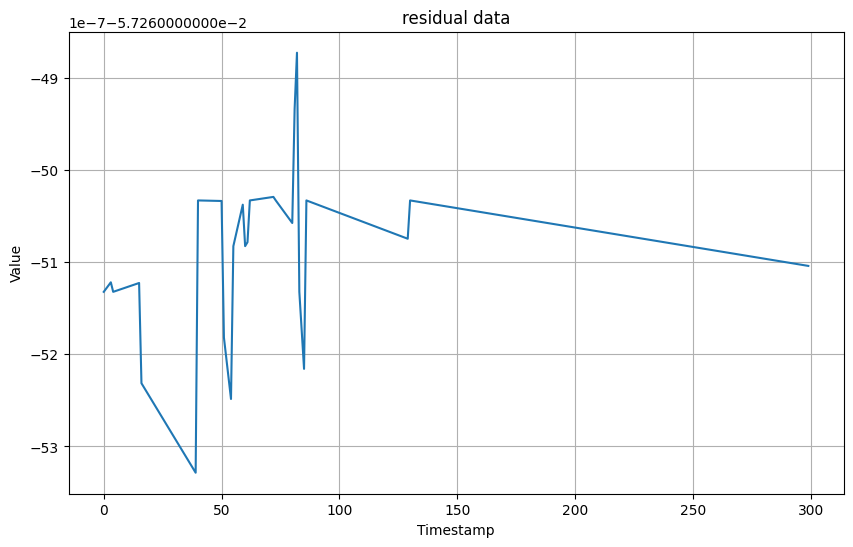

In [14]:
plot_simpleline([Point(r.timestamp,r.value-1/2*0.114530165) for r in residuals[:300]], title="residual data")

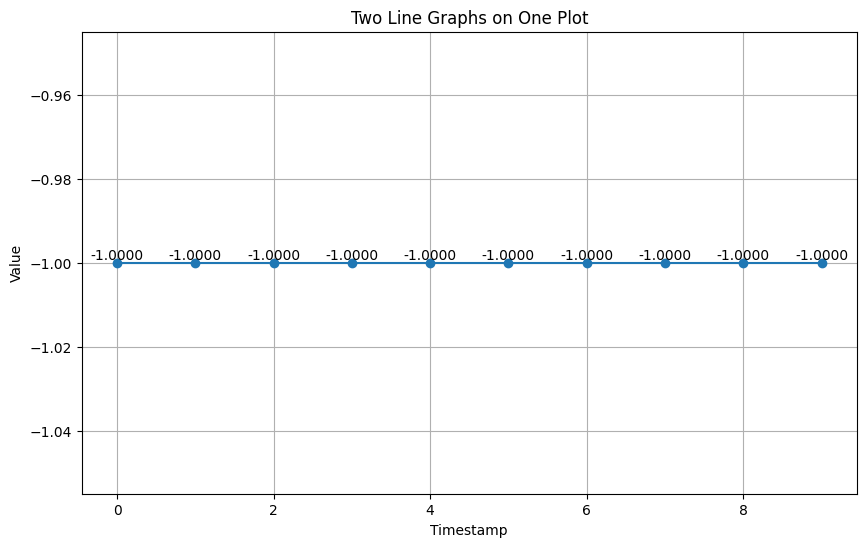

In [15]:
residualQuantiz = []
for r in residuals:
    residualQuantiz.append(round((r.value//0.005)))
plot_line_graph(range(10), residualQuantiz[:10])


In [16]:
#residuals =  [Point(p1.timestamp, p1.value - p2.value) for p1, p2 in zip( ts.data, tsDecompressed)]
print(len(residuals))
print(ts.size )

702000
5616000


In [17]:
print(f"Epsilon: {epsilonPct * 100:.2f}%\tCompression Ratio: {ts.size / compressedSize:.3f}\tExecution Time: {duration}ms\tRange Error: {ts.range * epsilonPct:.3f}")

Epsilon: 5.00%	Compression Ratio: 76.727	Execution Time: 1112ms	Range Error: 1.145


In [18]:
residualValue = []
for p in residuals:
    residualValue.append(p.value)

intList = float_to_int(residualValue, errorThre=0.05)
bytesWhenInt = totalbits_When_int(intList)/16
print(f"Compression Ratio = {ts.size / (compressedSize+bytesWhenInt):.3f}")

Compression Ratio = 47.971


In [19]:
print("ts.size = ", ts.size)
print("compressedSize= ", compressedSize)
print("compressedSize= ", bytesWhenInt )

ts.size =  5616000
compressedSize=  73195
compressedSize=  43875.0


In [20]:
print(intList[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
#ts.range  =  22.906033 errorthrehold = 0.05 Range Error: 1.145
errorAfterResiudals = 2*1.145*0.05
newError = errorAfterResiudals/ts.range
print("New error threhold is：", newError)

New error threhold is： 0.0049986830980292395
